In [54]:
!sudo apt install tesseract-ocr
!sudo apt-get install tesseract-ocr-vie

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-vie is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [55]:
!pip install pytesseract

In [56]:
!wget https://vcdn-giaitri.vnecdn.net/2023/09/08/nguoi-viet-noi-tieng-viet-1694-5862-7979-1694169835.jpg-O test_img.jpg

--2024-01-28 16:16:21--  https://vcdn-giaitri.vnecdn.net/2023/09/08/nguoi-viet-noi-tieng-viet-1694-5862-7979-1694169835.jpg-O
Resolving vcdn-giaitri.vnecdn.net (vcdn-giaitri.vnecdn.net)... 185.81.209.130, 162.220.220.146
Connecting to vcdn-giaitri.vnecdn.net (vcdn-giaitri.vnecdn.net)|185.81.209.130|:443... connected.
HTTP request sent, awaiting response... 415 Unsupported Media Type
2024-01-28 16:16:22 ERROR 415: Unsupported Media Type.

--2024-01-28 16:16:22--  http://test_img.jpg/
Resolving test_img.jpg (test_img.jpg)... failed: Name or service not known.
wget: unable to resolve host address ‘test_img.jpg’


In [114]:
import pytesseract
import shutil
import os
import random
import cv2

from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

img = Image.open("1003w-u95Ye77B-BQ.webp")

extractedInformation = pytesseract.image_to_string(img, lang="vie")


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


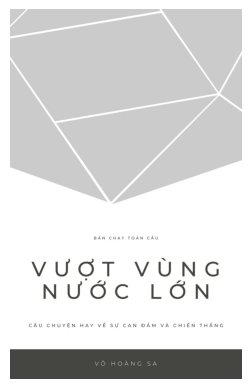

In [115]:
fig, axs = plt.subplots()

axs.set_axis_off()

axs.imshow(np.asarray(img))

In [104]:
extractedInformation

'BẢN \\Ẽ &\nKñY DƯNG\n\nSố †au bỏ túi về kiến trúc cơ bản\n\n \n\nVIẾT BỞI ÂU THANH LIÊM\n\x0c'

In [116]:
lines = extractedInformation.split('\n')
texts_array = []
# Lọc các xâu không rỗng (loại bỏ các dòng trắng)
non_empty_lines = [line.strip() for line in lines if line.strip()]
non_empty_lines.pop()
# In kết quả
for i in non_empty_lines:
  texts_array.append(i)


In [117]:
texts_array

['BÁN CHẠY TOÀN CẦU',
 'VƯỢT VÙNG',
 'NƯỚC LỚN',
 'CÂU CHUYỆN HAY VỀ SỰ CAN ĐẢM VÀ CHIẾN THẮNG']

In [118]:
texts_predict = ' '.join(texts_array)

In [119]:
texts_predict

'BÁN CHẠY TOÀN CẦU VƯỢT VÙNG NƯỚC LỚN CÂU CHUYỆN HAY VỀ SỰ CAN ĐẢM VÀ CHIẾN THẮNG'

In [120]:
texts_lables = 'BÁN CHẠY TOÀN CẦU VƯỢT VÙNG NƯỚC LỚN CÂU CHUYỆN HAY VỀ SỰ CAN ĐẢM VÀ CHIẾN THẮNG VÕ HOÀNG HÒA'

Acurracy Tesseract

In [121]:
from difflib import SequenceMatcher

def similarity_ratio(str1, str2):
    seq_matcher = SequenceMatcher(None, str1, str2)
    return seq_matcher.ratio()

Accuracy_paddel = similarity_ratio(texts_predict, texts_lables)
print(f"Độ tương đồ: {Accuracy_paddel}")


Độ tương đồ: 0.9248554913294798


Classication


In [2]:
!pip install transformers

In [3]:
from transformers import BertTokenizer, BertForSequenceClassification

In [4]:
!pip install torch

In [5]:
import torch

In [6]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
PRETRAINED_LM = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [32]:
from transformers import BertForSequenceClassification
N_labels = 2
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
saved_model_path = '/content/drive/MyDrive/model2.pth'

# Load trọng số đã lưu vào mô hình
model.load_state_dict(torch.load(saved_model_path))

<All keys matched successfully>

In [ ]:
model.eval()

In [122]:
tac_gia = []
tac_pham = []
Gioi_thieu = []

In [123]:
for user_text in texts_array:
  word_list = user_text.split()
  if len(word_list) > 5:
      Gioi_thieu.append(user_text)
  else:
    encoded_user_input = tokenizer(user_text, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
      outputs = model(encoded_user_input['input_ids'], attention_mask=encoded_user_input['attention_mask'])
      logits = outputs.logits
      predicted_class = torch.argmax(logits, dim=1).item()
      if(predicted_class == 0):
        tac_gia.append(user_text)
      elif(predicted_class==1):
        tac_pham.append(user_text)


In [124]:
tac_pham = ' '.join(tac_pham)
tac_gia = ' '.join(tac_gia)
Gioi_thieu  = ' '.join(Gioi_thieu )


In [125]:
import pandas as pd
data = {'Tac_pham': [], 'Tac_gia':[],'Gioi_thieu':[]}
df = pd.DataFrame(data)

In [126]:
new_data = {'Tac_pham': [tac_pham],
            'Tac_gia': [tac_gia],
            'Gioi_thieu': [Gioi_thieu]}
df = df.append(pd.DataFrame(new_data), ignore_index=True)

<ipython-input-126-30fdeecc96fb>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(new_data), ignore_index=True)


In [127]:
df

,Tac_pham,Tac_gia,Gioi_thieu
0,BÁN CHẠY TOÀN CẦU NƯỚC LỚN,VƯỢT VÙNG,CÂU CHUYỆN HAY VỀ SỰ CAN ĐẢM VÀ CHIẾN THẮNG


*Acuracy*

In [128]:
Gioi_thieu_label = 'CÂU CHUYỆN HAY VỀ SỰ CAN ĐẢM VÀ CHIẾN THẮNG'
tac_pham_label = '	VƯỢT VÙNG NƯỚC LỚN	 '
tac_gia_label = 'VÕ HOÀNG HÀ'

In [129]:
Accuracy_classifies = (similarity_ratio(Gioi_thieu, Gioi_thieu_label) + similarity_ratio(tac_pham, tac_pham_label)+similarity_ratio(tac_gia, tac_gia_label))/3
print((Accuracy_classifies+Accuracy_paddel)/2)

0.766683064813676
